In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
import re
import os
if ('Users/maxv' in os.getcwd()):
    base = "/Users/maxv/Dropbox (MIT)/inferring_expectations/" 
else:
    base = '/pool001/vilgalys/inferring_expectations/'

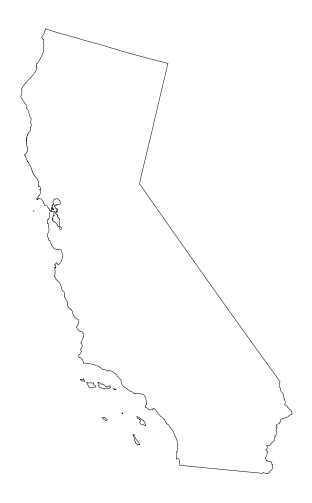

In [2]:

state_fp = base + 'data/shapes/cb_2016_us_state_500k/cb_2016_us_state_500k.shp'
state_df = gpd.read_file(state_fp)
state_df = state_df[state_df.STUSPS.isin(['CA'])]
state_df = state_df.to_crs(epsg=2163)
fig, ax = plt.subplots(1, figsize=(15, 9))
state_df.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)
ax.axis('off');

In [20]:
def parse_time(text):
    if text is None: return None
    if str(text) == 'NaT': return None
    text = text.split(' ')[0]
    return parser.parse(text, dayfirst=False)
psps_gdb['date'] = psps_gdb['Outage Sta'].apply(parse_time)
thing = psps_gdb.groupby(['identifier','date']).filter(lambda x: len(x) >= 2).copy()
thing

,clean_name,Utility,Outage Sta,Full Resto,Outage Dur,Outage Day,Outage Hou,Circuit Na,HFTD,TOTAL CUST,RESIDENTIA,COMMERCIAL,MEDICAL BA,OTHER CUST,Notes,geometry,identifier,date
6,acosta,SCE,11/26/20 21:55,11/28/20 14:13,"1 days,16 hrs,18 min",1.679,40.30,ACOSTA,T2/T3,2,0,2,0,0,None,"MULTILINESTRING ((-1601640.205 -1036273.404, -...",acosta_SCE,2020-11-26
7,acosta,SCE,11/26/20 21:55,11/28/20 14:13,"1 days,16 hrs,18 min",1.679,40.30,ACOSTA,T2/T3,3,0,3,0,0,None,"MULTILINESTRING ((-1601640.205 -1036273.404, -...",acosta_SCE,2020-11-26
8,acosta,SCE,12/2/20 21:53,12/4/20 18:30,"1 days,20 hrs,37 min",1.859,44.62,ACOSTA,T2/T3,2,0,2,0,0,None,"MULTILINESTRING ((-1601640.205 -1036273.404, -...",acosta_SCE,2020-12-02
9,acosta,SCE,12/2/20 21:53,12/4/20 18:30,"1 days,20 hrs,37 min",1.859,44.62,ACOSTA,T2/T3,3,0,3,0,0,None,"MULTILINESTRING ((-1601640.205 -1036273.404, -...",acosta_SCE,2020-12-02
11,alola #2,SCE,12/8/20 0:44,12/8/20 14:57,"0 days,14 hrs,13 min",0.592,14.22,ALOLA #2,T3,1,1,0,0,0,None,"MULTILINESTRING ((-1551542.390 -1069995.607, -...",alola #2_SCE,2020-12-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4663,971,SDG&E,10/24/19 11:35,10/25/19 17:41,"1 days,6 hrs,6 min",1.254,30.10,971-26R,Tier 2,1017,887,149,83,18,None,"MULTILINESTRING ((-1568909.294 -1176115.931, -...",971_SDG&E,2019-10-24
4664,971,SDG&E,10/24/19 11:35,10/25/19 17:51,"1 days,6 hrs,16 min",1.261,30.27,971-379R,Tier 3,None,None,None,None,None,None,"MULTILINESTRING ((-1568909.294 -1176115.931, -...",971_SDG&E,2019-10-24
4668,973,SDG&E,10/25/19 3:28,10/25/19 18:36,"0 days,15 hrs,8 min",0.631,15.13,973-626R,Tier 3,None,None,None,None,None,None,"MULTILINESTRING ((-1562535.411 -1180329.730, -...",973_SDG&E,2019-10-25
4669,973,SDG&E,10/25/19 3:28,10/25/19 18:11,"0 days,14 hrs,43 min",0.613,14.72,973-630R,Tier 2,1350,1228,129,110,24,None,"MULTILINESTRING ((-1562535.411 -1180329.730, -...",973_SDG&E,2019-10-25


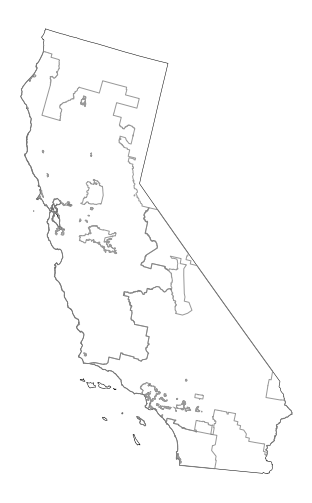

In [3]:
service_area_db = gpd.read_file(base + 'data/Utility_Service_Areas.shp').to_crs(epsg=2163)
service_area_db = service_area_db[service_area_db['Acronym'].isin(['SCE','PG&E','SDG&E'])]
fig, ax = plt.subplots(1, figsize=(15, 9))
state_df.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)
ax.axis('off');
service_area_db.plot(ax=ax,color='none',edgecolor='gray',alpha=0.8, legend=True);
plt.show();

In [18]:
psps_gdb.head()

,clean_name,Utility,Outage Sta,Full Resto,Outage Dur,Outage Day,Outage Hou,Circuit Na,HFTD,TOTAL CUST,RESIDENTIA,COMMERCIAL,MEDICAL BA,OTHER CUST,Notes,geometry,identifier
0,accent,SCE,1/19/21 12:40,1/19/21 21:54,"0 days,9 hrs,13 min",0.385,9.23,ACCENT,T2,1584,1477,26,81,0,None,"MULTILINESTRING ((-1579980.231 -1073143.190, -...",accent_SCE
1,acosta,SCE,10/10/19 8:14,10/12/19 10:05,"2 days,1 hrs,51 min",2.077,49.85,ACOSTA,Tier 2/Tier 3,5,0,0,0,0,None,"MULTILINESTRING ((-1601640.205 -1036273.404, -...",acosta_SCE
2,acosta,SCE,10/24/19 4:48,10/25/19 14:28,"1 days,9 hrs,40 min",1.403,33.67,Acosta 12kV,Tier 2/Tier 3,1243,1139,63,36,99,None,"MULTILINESTRING ((-1601640.205 -1036273.404, -...",acosta_SCE
3,acosta,SCE,10/28/19 6:49,10/29/19 9:55,"1 days,3 hrs,6 min",1.129,27.10,ACOSTA,None,1243,1139,63,36,None,None,"MULTILINESTRING ((-1601640.205 -1036273.404, -...",acosta_SCE
4,acosta,SCE,10/30/19 1:30,11/1/19 11:53,"2 days,10 hrs,23 min",2.433,58.38,ACOSTA,None,1243,1139,63,36,None,None,"MULTILINESTRING ((-1601640.205 -1036273.404, -...",acosta_SCE


In [6]:
psps_gdb = gpd.read_file(base + 'data/psps_events/psps_events.shp')
psps_gdb['Utility'] = np.where(psps_gdb.Utility == 'PGE', 'PG&E', psps_gdb.Utility)
psps_gdb['Utility'] = np.where(psps_gdb.Utility == 'SDGE', 'SDG&E', psps_gdb.Utility)
overall_circuits = gpd.read_file(base + 'data/all_ica_maps/')
overall_circuits['identifier'] = overall_circuits.clean_name + '_' + overall_circuits.Utility
psps_gdb['identifier'] = psps_gdb.clean_name + '_' + psps_gdb.Utility
overall_circuits['psps_flag'] = np.where(overall_circuits.identifier.isin(psps_gdb.identifier.unique()), 
                                        1, 0)
overall_circuits['psps'] = np.where(overall_circuits.identifier.isin(psps_gdb.identifier.unique()), 
                                        'PSPS', 'No PSPS')
fire_db = pd.read_csv(base + 'data/cpuc_with_circuit.csv')
overall_circuits['fire_flag'] = np.where(overall_circuits.identifier.isin(fire_db.identifier.unique()), 
                                        1, 0)
overall_circuits['fire'] = np.where(overall_circuits.identifier.isin(fire_db.identifier.unique()), 
                                        'Ignition', 'No Ignition')
overall_circuits['flag'] = np.where(overall_circuits.fire_flag, 'Ignition only', 'Neither')
overall_circuits['flag'] = np.where(overall_circuits.psps_flag, 'PSPS only', overall_circuits.flag)
overall_circuits['flag'] = np.where(overall_circuits.psps_flag & overall_circuits.fire_flag,
                                    'Ignition & PSPS', overall_circuits.flag)
overall_circuits.head()

,clean_name,Utility,geometry,identifier,psps_flag,psps,fire_flag,fire,flag
0,abacus,SCE,"MULTILINESTRING ((-1577821.226 -1045828.294, -...",abacus_SCE,0,No PSPS,1,Ignition,Ignition only
1,abraham,SCE,"MULTILINESTRING ((-1715777.133 -999236.507, -1...",abraham_SCE,0,No PSPS,0,No Ignition,Neither
2,academy,SCE,"MULTILINESTRING ((-1728003.845 -1007083.593, -...",academy_SCE,0,No PSPS,1,Ignition,Ignition only
3,acadian,SCE,"MULTILINESTRING ((-1561559.074 -1095145.654, -...",acadian_SCE,0,No PSPS,0,No Ignition,Neither
4,acapulco,SCE,"MULTILINESTRING ((-1639778.819 -1055239.507, -...",acapulco_SCE,0,No PSPS,1,Ignition,Ignition only


In [10]:
np.sum(overall_circuits.psps_flag)

1103

In [66]:
unique_things = overall_circuits.identifier.unique()
for circuit in psps_gdb.identifier.unique():
    if circuit not in unique_things:
        print(circuit)
print("Fire time!")
for circuit in fire_db.identifier.unique():
    if circuit not in unique_things:
        print(circuit)

Fire time!


In [22]:
psps_gdb.groupby(['identifier','date']).mean().shape

(3333, 1)

In [11]:
print(1 - np.mean(overall_circuits.flag == 'Neither'))
print(np.mean(overall_circuits))

0.3771946035852892
psps_flag    0.203844
fire_flag    0.198669
dtype: float64


/opt/homebrew/Caskroom/miniforge/base/envs/mypy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [50]:
overall_circuits.head(100)

,clean_name,Utility,geometry,identifier,psps_flag,fire_flag,flag
0,abacus,SCE,"MULTILINESTRING ((-1577821.226 -1045828.294, -...",abacus_SCE,0,1,Ignition only
1,abraham,SCE,"MULTILINESTRING ((-1715777.133 -999236.507, -1...",abraham_SCE,0,0,Neither
2,academy,SCE,"MULTILINESTRING ((-1728003.845 -1007083.593, -...",academy_SCE,0,1,Ignition only
3,acadian,SCE,"MULTILINESTRING ((-1561559.074 -1095145.654, -...",acadian_SCE,0,0,Neither
4,acapulco,SCE,"MULTILINESTRING ((-1639778.819 -1055239.507, -...",acapulco_SCE,0,1,Ignition only
...,...,...,...,...,...,...,...
95,blackburn,SCE,"MULTILINESTRING ((-1603991.335 -1071530.548, -...",blackburn_SCE,0,1,Ignition only
96,blackfoot,SCE,"MULTILINESTRING ((-1587944.300 -1087117.891, -...",blackfoot_SCE,0,1,Ignition only
97,blackhills,SCE,"MULTILINESTRING ((-1601122.998 -1057394.407, -...",blackhills_SCE,1,1,Ignition & PSPS
98,bledsoe,SCE,"MULTILINESTRING ((-1668829.347 -960852.770, -1...",bledsoe_SCE,0,1,Ignition only


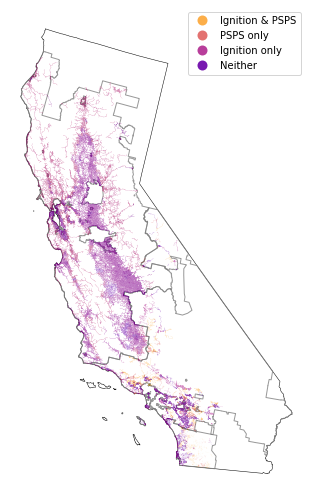

In [7]:
fig, ax = plt.subplots(1, figsize=(15, 9))
state_df.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)
ax.axis('off');
cmap = cm.get_cmap('plasma', 6)    # 11 discrete colorsc
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = truncate_colormap(cmap, 0.75, 0.25)
service_area_db.plot(ax=ax,color='none',edgecolor='gray',alpha=0.8, legend=True);
overall_circuits.plot(ax=ax,column='flag',alpha=0.9, linewidth=0.1, legend=True, cmap=cmap, 
                                categories = ['Ignition & PSPS','PSPS only','Ignition only', 'Neither' ])
plt.savefig(base + 'outputs/summary_stats/circuit_map.png',bbox_inches='tight', dpi=200)
plt.show();

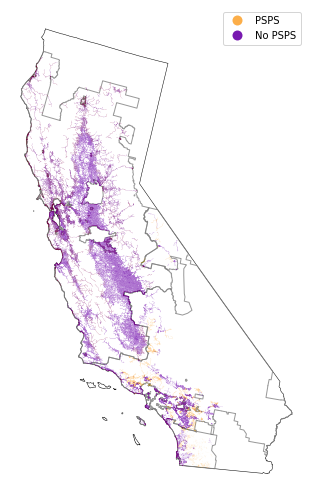

In [8]:
fig, ax = plt.subplots(1, figsize=(15, 9))
state_df.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)
ax.axis('off');
cmap = cm.get_cmap('plasma', 6)    # 11 discrete colorsc
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = truncate_colormap(cmap, 0.75, 0.25)
service_area_db.plot(ax=ax,color='none',edgecolor='gray',alpha=0.8, legend=True);
overall_circuits.plot(ax=ax,column='psps',alpha=0.9, linewidth=0.1, legend=True, cmap=cmap, 
                                categories = ['PSPS','No PSPS'])
plt.savefig(base + 'outputs/summary_stats/circuit_map_psps.png',bbox_inches='tight', dpi=200)
plt.show();

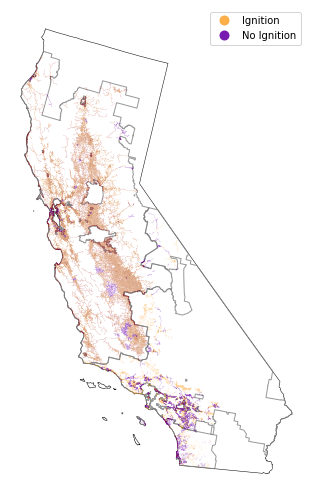

In [9]:
fig, ax = plt.subplots(1, figsize=(15, 9))
state_df.plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)
ax.axis('off');
cmap = cm.get_cmap('plasma', 6)    # 11 discrete colorsc
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = truncate_colormap(cmap, 0.75, 0.25)
service_area_db.plot(ax=ax,color='none',edgecolor='gray',alpha=0.8, legend=True);
overall_circuits.plot(ax=ax,column='fire',alpha=0.9, linewidth=0.1, legend=True, cmap=cmap, 
                                categories = ['Ignition','No Ignition'])
plt.savefig(base + 'outputs/summary_stats/circuit_map_ignition.png',bbox_inches='tight', dpi=200)
plt.show();

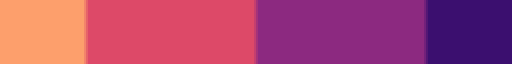

In [65]:
import matplotlib.cm as cm
import matplotlib.colors as colors
cmap = cm.get_cmap('magma', 6)    # 11 discrete colorsc
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
cmap = truncate_colormap(cmap, 0.75, 0.25)
cmap

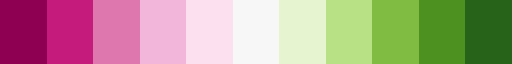